In [334]:
import numpy as np
import time
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

In [305]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [21, 25, 27, 20, 25, 18, 35, 60, 20, 30]],  # возраст репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0]) # подходит или нет репетитор

X

array([[1.00e+00, 1.00e+00, 5.00e+02, 2.10e+01],
       [1.00e+00, 1.00e+00, 7.00e+02, 2.50e+01],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.70e+01],
       [1.00e+00, 1.00e+00, 6.00e+02, 2.00e+01],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.50e+01],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.80e+01],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.50e+01],
       [1.00e+00, 1.00e+01, 2.00e+03, 6.00e+01],
       [1.00e+00, 1.00e+00, 4.50e+02, 2.00e+01],
       [1.00e+00, 2.00e+00, 1.00e+03, 3.00e+01]])

In [306]:
p = 0.9
np.log(p / (1 - p))

2.1972245773362196

In [307]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (как вариант - использовать np.clip или np.where).

In [308]:
def calc_logloss(y, p):
    err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))
    return err
 

In [309]:
calc_logloss(y=1, p=0)

<ipython-input-308-f47c921de0e0>:2: RuntimeWarning: divide by zero encountered in log
  err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))


inf

In [310]:
def calc_logloss(y, p):
    p = np.where(p == 1, 1 - 1e-8, p)
    p = np.where(p == 0, 0 + 1e-8, p)
    err = - np.mean(y * np.log(p) + (1.0 - y) * np.log(1.0 - p))
    return err

In [311]:
calc_logloss(y=1, p=0)

18.420680743952367

In [312]:
def standardization(X):
    S = (X - X.mean(axis=0)) / X.std(axis=0)
    return S

X_st = X.copy()
X_st[:, 1:] = standardization(X[:, 1:])
X_st

array([[ 1.        , -0.57142857, -0.97958969, -0.60595294],
       [ 1.        , -0.57142857, -0.56713087, -0.264571  ],
       [ 1.        , -0.21428571, -0.46401617, -0.09388003],
       [ 1.        , -0.57142857, -0.77336028, -0.69129842],
       [ 1.        ,  0.14285714,  0.97958969, -0.264571  ],
       [ 1.        , -0.92857143, -0.36090146, -0.86198939],
       [ 1.        ,  0.85714286,  1.08270439,  0.58888384],
       [ 1.        ,  2.64285714,  2.11385144,  2.72252095],
       [ 1.        , -0.57142857, -1.08270439, -0.69129842],
       [ 1.        , -0.21428571,  0.05155735,  0.16215642]])

In [313]:
# логистическая регрессия
def eval_LR_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w) # log(p/(1-p))
        pred = sigmoid(z) # p [0, 1]
        w -= eta * (1/n * np.dot((pred - y), X))
        err = calc_logloss(y, sigmoid(np.dot(X, w)))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [314]:
w = eval_LR_model(X_st, y, iterations=100, eta=0.1)

10 [ 0.36065583 -0.3972585   0.51937535  1.19161524] 0.972199021173242
20 [ 0.215788   -0.61251766  0.44159174  0.90102578] 0.8152129340815597
30 [ 0.08277136 -0.76559453  0.42551123  0.67107078] 0.7212678942568461
40 [-0.02507329 -0.85541749  0.46585326  0.50463174] 0.6722796074198796
50 [-0.10912684 -0.90576455  0.53830407  0.37884616] 0.6416699927595096
60 [-0.17469927 -0.93640342  0.62421319  0.27424279] 0.6181685428656378
70 [-0.22617113 -0.95733883  0.71436092  0.18090474] 0.5982903907109156
80 [-0.26681997 -0.97319728  0.80460517  0.09421158] 0.5807656397146188
90 [-0.29911987 -0.98614533  0.89312045  0.01196478] 0.5649873364632754
100 [-0.32495521 -0.99723356  0.97913034 -0.06693668] 0.5506011060815839


3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса "1". На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model.


In [315]:
def calc_pred_proba(w, X):
    y_pred_proba = sigmoid(np.dot(X_st, w))
    return y_pred_proba

In [316]:
calc_pred_proba(w, X_st).round(2)

array([0.34, 0.43, 0.36, 0.39, 0.62, 0.58, 0.46, 0.25, 0.32, 0.48])

4. Создайте функцию calc_pred, возвращающую предсказанные классы (0 или 1). На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model, а также порог вероятности.

In [317]:
def calc_pred(w, X):
    y_pred_proba = calc_pred_proba(w, X)
    y_pred = np.where(y_pred_proba > 0.5, 1, 0)
    return y_pred

In [318]:
y_pred = calc_pred(w, X_st)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

5. (*) Напишите функции для расчета accuracy, матрицы ошибок, precision и recall, а также F1-score.

In [326]:
confusion_matrix = np.zeros((2, 2))
for i in range(len(y)):
    if y_pred[i] == 1 and y[i] != 0:
        confusion_matrix[0][0] += 1
    elif y_pred[i] == 1 and y[i] != 1:
        confusion_matrix[0][1] += 1
    elif y_pred[i] == 0 and y[i] != 1:
        confusion_matrix[1][1] += 1
    else:
        confusion_matrix[1][0] += 1
confusion_matrix

array([[2., 0.],
       [2., 6.]])

In [327]:
def accuracy(confusion_matrix):
    return (confusion_matrix[0][0] + confusion_matrix[1][1]) / (confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[1][1] + confusion_matrix[1][0])

In [328]:
def precision(confusion_matrix):
    return confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1])

def recall(confusion_matrix):
    return confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[1][0])

In [329]:
def f_score(confusion_matrix):
    return ((2 * precision(confusion_matrix) * recall(confusion_matrix)/(precision(confusion_matrix) + recall(confusion_matrix)))).round(2)

In [330]:
print(f' Accuracy {accuracy(confusion_matrix)}, recall {recall(confusion_matrix)}, precision {precision(confusion_matrix)}, f1_score {f_score(confusion_matrix)}')

 Accuracy 0.8, recall 0.5, precision 1.0, f1_score 0.67


In [331]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print(f'accuracy {accuracy_score(y, y_pred)}')
print(f'precision {precision_score(y, y_pred)}')
print(f'recall {recall_score(y, y_pred)}')
print(f'f1-score {f1_score(y, y_pred).round(2)}')
print(f'\n {confusion_matrix(y, y_pred)}')

accuracy 0.8
precision 1.0
recall 0.5
f1-score 0.67

 [[6 0]
 [2 2]]


2 Problem - На данных из урока изучите влияние гиперпараметров на ошибку алгоритма.

In [336]:
# setting up the experiment 
def params(eta,iterations,w,n,X, diff = None):
    iterat = []
    errs = []
    flag_break = 0
 
    n = X.shape[0]
    for i in range(1, int(iterations + 1)):       
        z = np.dot(w, X.T)
        pred = sigmoid(z)        
        err = calc_logloss(y, sigmoid(np.dot(X, w)))
        w -= eta * (1/n * np.dot((pred - y), X))
        for j in range(w.shape[0]):
            w -= eta * (1/n * np.dot((pred - y), X))   
            iterat.append(i)
            errs.append(err)
            if diff != None and (err - 45.937499999999986) <= diff:                    
                flag_break = 1
                break
        if flag_break == 1:
            break
            
    print(f'LogLoss  when eta = {eta}, iterations = {i} w = {w}, LogLoss = {err}') 
    return iterat, errs

In [337]:
np.random.seed(42)
w = np.random.randn(X.shape[1])
n = X.shape[0]
eta = 1e-3
iterations = 1e4



LogLoss  when eta = 0.0001, iterations = 10000 w = [ 0.46125507 -1.52594085  0.12465891 -9.38868845], LogLoss = 4.75920053036041
time 0.755333 s


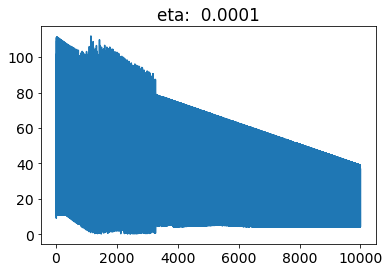

<ipython-input-307-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


LogLoss  when eta = 0.00025, iterations = 10000 w = [  0.78403046  -5.1276867    0.63920989 -28.24826074], LogLoss = 3.9568299719575086
time 0.772047 s


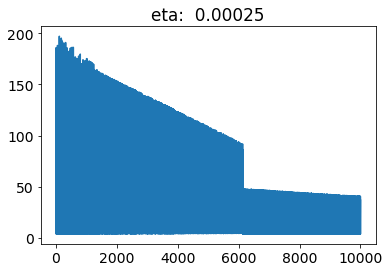

LogLoss  when eta = 0.0005, iterations = 10000 w = [  1.71721273 -12.25802983   1.36328497 -58.83673911], LogLoss = 4.578130390019981
time 0.859261 s


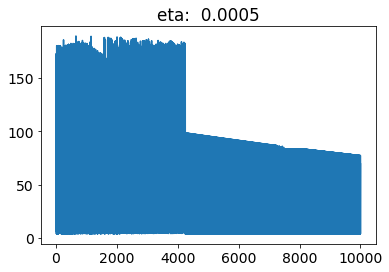

LogLoss  when eta = 0.00075, iterations = 10000 w = [  3.57869258 -22.79365078   2.01272813 -92.59681621], LogLoss = 3.684136671675611
time 0.784916 s


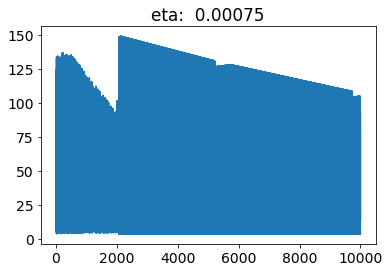

LogLoss  when eta = 0.0085, iterations = 10000 w = [   7.30909421 -140.08590458   17.1281305  -859.46630492], LogLoss = 3.6841361547855214
time 0.791575 s


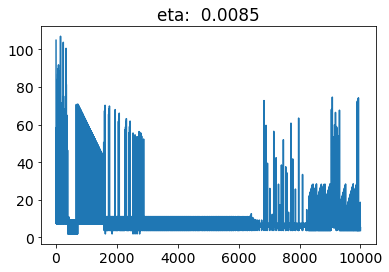

LogLoss  when eta = 0.001, iterations = 10000 w = [   9.31735762 -141.06687776   25.94154214 -849.22290257], LogLoss = 1.8420680823952371
time 0.901542 s


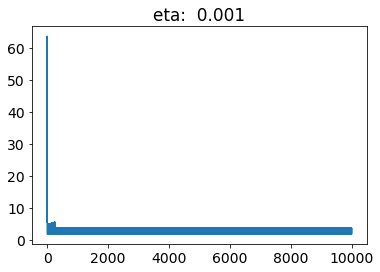

LogLoss  when eta = 0.01, iterations = 10000 w = [   36.4409675   -282.57818589    41.40819769 -1244.07426341], LogLoss = 5.52620423018571
time 0.708267 s


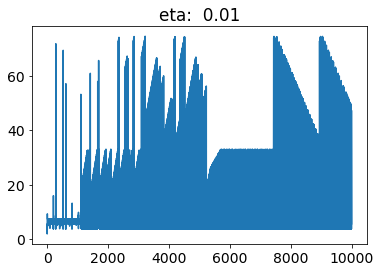

In [338]:
for eta in [0.0001, 0.00025, 0.0005, 0.00075, 0.0085, 0.001, 0.01]:
    start = time.time()
    iterat, errs = params(eta, 1e4, w, n, X)
    print ('time {:g} s'.format(time.time() - start))
    plt.title(f"eta:  {eta}")
    plt.plot(iterat, errs)    
    plt.show()

LogLoss  when eta = 0.0001, iterations = 1000 w = [ 0.47185692 -0.26998632 -0.18712502  0.11823685], LogLoss = 11.052408447356566
0.134053 s


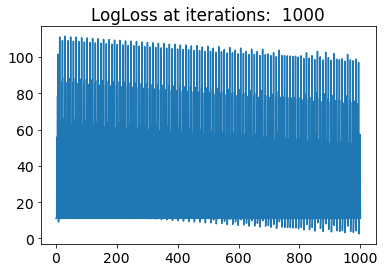

LogLoss  when eta = 0.0001, iterations = 1500 w = [ 0.4411439  -0.45978166 -0.16647787 -1.82678725], LogLoss = 6.077825614206967
0.104808 s


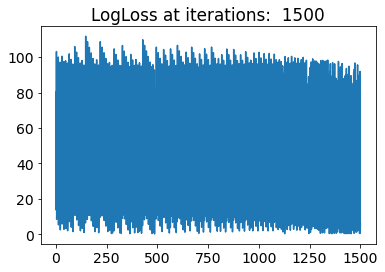

LogLoss  when eta = 0.0001, iterations = 15000 w = [  0.64805964  -2.58158368   0.28609394 -12.77659026], LogLoss = 5.276596321674306
0.974805 s


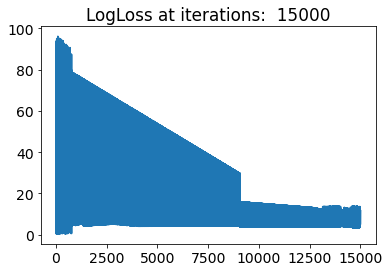

LogLoss  when eta = 0.0001, iterations = 20000 w = [  1.19859079  -3.98012826   0.42159284 -13.80076071], LogLoss = 11.606053477606155
1.52026 s


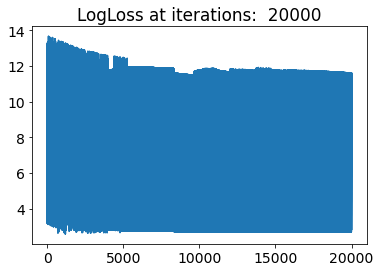

LogLoss  when eta = 0.0001, iterations = 30000 w = [  1.96969471  -5.57832972   0.40132436 -13.51558183], LogLoss = 5.114575482843754
2.36663 s


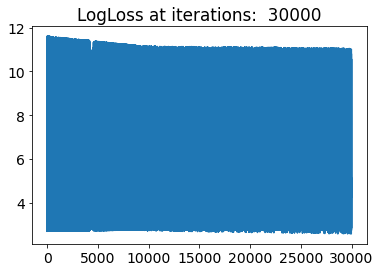

LogLoss  when eta = 0.0001, iterations = 40000 w = [  2.95458865  -7.35647091   0.35832159 -12.19945402], LogLoss = 5.141810727795578
3.01078 s


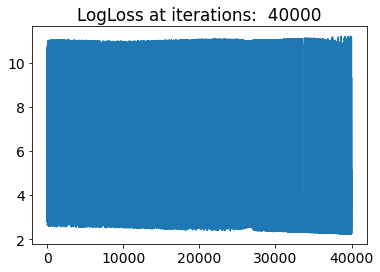

In [339]:
np.random.seed(42)
w = np.random.randn(X.shape[1])
n = X.shape[0]
eta = 1e-3
iterations = 1e4

j=0

for iterations in [1000, 1500, 15000, 20000, 30000, 40000]:
    start = time.time()
    iterat, errs = params(0.0001, iterations, w, n, X) 
    print ("{:g} s".format(time.time() - start))
    plt.plot(iterat, errs)    
    plt.title(f"LogLoss at iterations:  {iterations}")

    plt.show()

<ipython-input-307-dc64dee5606b>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


LogLoss  when eta = 0.0008333333333333334, iterations = 5000 w = [  0.25537179  -5.60807206  -0.29729903 -42.66073697], LogLoss = 6.102066903707018
Time 0.388507 s


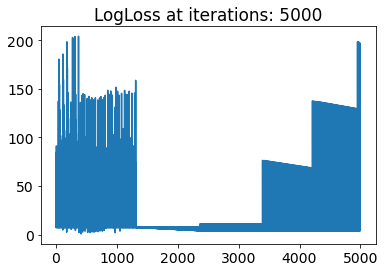

LogLoss  when eta = 0.0008333333333333334, iterations = 5000 w = [  0.41616026 -11.61021296   1.76764014 -83.45281343], LogLoss = 5.591926420314796
Time 0.397723 s


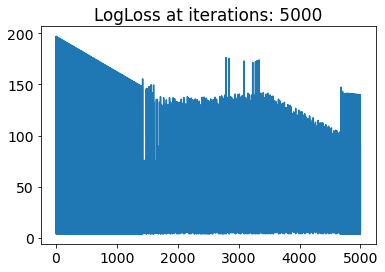

LogLoss  when eta = 0.0008333333333333334, iterations = 5000 w = [  1.66316428 -17.5609321    2.01468715 -96.86651264], LogLoss = 3.6843964774819
Time 0.32205 s


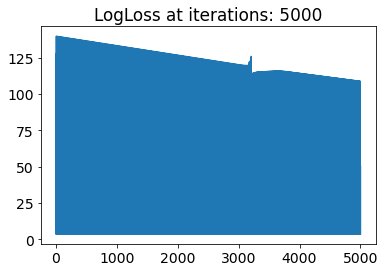

LogLoss  when eta = 0.0008333333333333334, iterations = 5000 w = [   2.98327564  -22.91283773    2.58103556 -107.05657499], LogLoss = 4.86916891884761
Time 0.318486 s


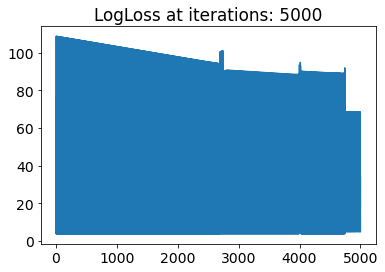

LogLoss  when eta = 0.0008333333333333334, iterations = 5000 w = [   4.27115208  -26.6468548     2.64238762 -109.28635778], LogLoss = 5.892331523500471
Time 0.338555 s


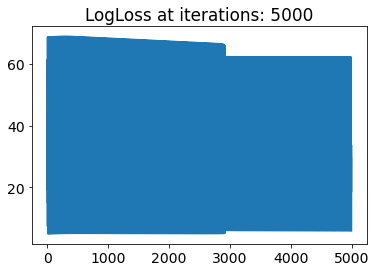

LogLoss  when eta = 0.0008333333333333334, iterations = 5000 w = [   5.48657244  -29.76800644    3.20078459 -109.61387343], LogLoss = 22.111583762220963
Time 0.334328 s


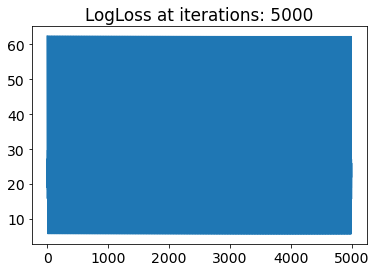

LogLoss  when eta = 0.0008333333333333334, iterations = 5000 w = [   6.57451559  -32.14839676    2.52990773 -109.86611977], LogLoss = 14.120466772534453
Time 0.326226 s


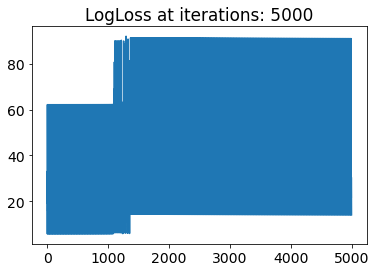

LogLoss  when eta = 0.00045454545454545455, iterations = 10000 w = [   7.93849478  -35.3270293     3.21363864 -105.30242603], LogLoss = 28.71634135816342
Time 0.835344 s


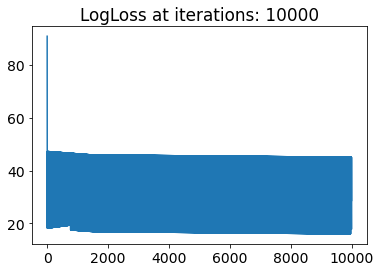

LogLoss  when eta = 0.00045454545454545455, iterations = 10000 w = [   9.3019999   -38.50910996    3.08239433 -100.76090881], LogLoss = 27.689823510571596
Time 0.73403 s


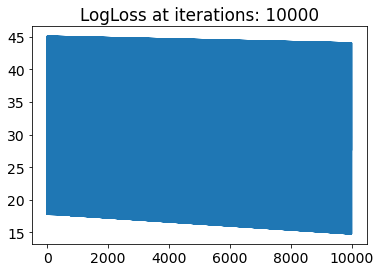

LogLoss  when eta = 0.00045454545454545455, iterations = 10000 w = [ 10.52095277 -40.82320292   3.03542631 -96.2168633 ], LogLoss = 21.52932745517492
Time 0.619421 s


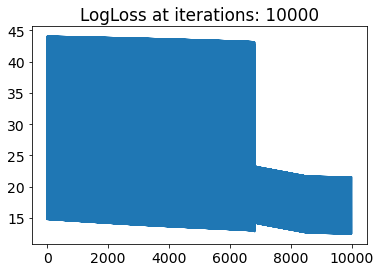

LogLoss  when eta = 0.00045454545454545455, iterations = 10000 w = [ 11.42997525 -41.27841331   2.90099092 -91.67544182], LogLoss = 20.467226599862713
Time 1.01247 s


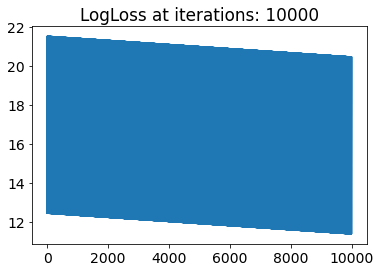

LogLoss  when eta = 0.00045454545454545455, iterations = 10000 w = [ 12.33899183 -41.73358888   2.76647917 -87.13402263], LogLoss = 19.409709274954608
Time 0.761326 s


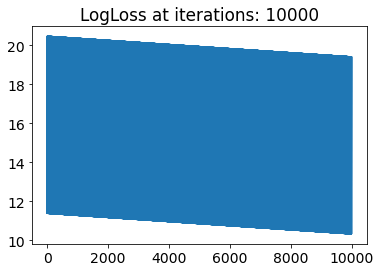

LogLoss  when eta = 0.00045454545454545455, iterations = 10000 w = [ 13.24798349 -42.18861868   2.63149884 -82.59261749], LogLoss = 18.380322851310368
Time 0.745407 s


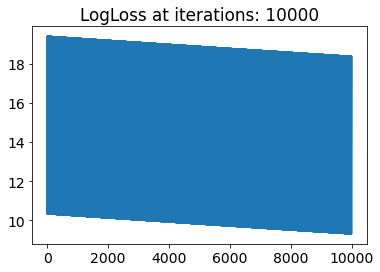

LogLoss  when eta = 0.00045454545454545455, iterations = 10000 w = [ 14.15694381 -42.64346844   2.49552218 -78.05124225], LogLoss = 17.41076051105514
Time 0.674475 s


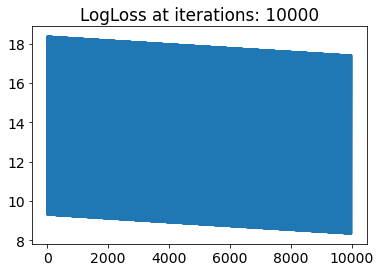

LogLoss  when eta = 0.0003125, iterations = 15000 w = [ 15.09430614 -43.11249378   2.35785186 -73.36787236], LogLoss = 13.694950130494352
Time 0.903632 s


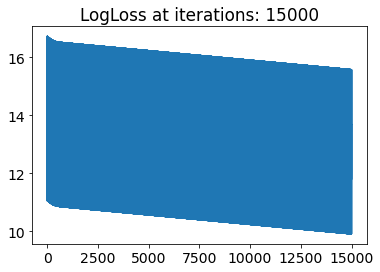

LogLoss  when eta = 0.0003125, iterations = 15000 w = [ 16.03166565 -43.58152478   2.21735401 -68.68458729], LogLoss = 12.711418117636788
Time 1.12021 s


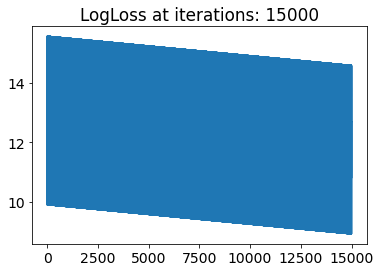

LogLoss  when eta = 0.0003125, iterations = 15000 w = [ 16.96902515 -44.05055577   2.07685616 -64.00130223], LogLoss = 11.727886104777385
Time 1.03881 s


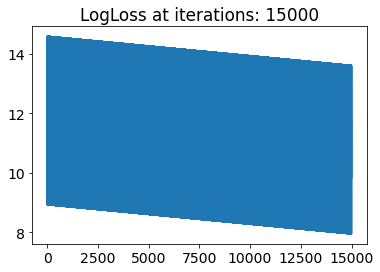

LogLoss  when eta = 0.0003125, iterations = 15000 w = [ 17.90638465 -44.51958677   1.93635831 -59.31801716], LogLoss = 10.74435409187313
Time 1.07992 s


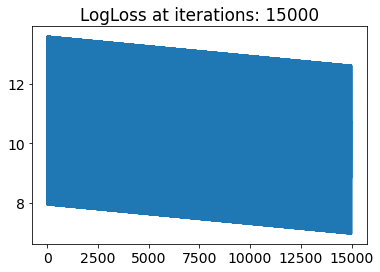

LogLoss  when eta = 0.0003125, iterations = 15000 w = [ 18.84374415 -44.98861776   1.79586047 -54.6347321 ], LogLoss = 9.760822078973877
Time 1.07615 s


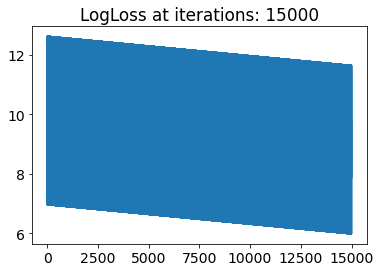

LogLoss  when eta = 0.0003125, iterations = 15000 w = [ 19.78110365 -45.45764876   1.65536262 -49.95144703], LogLoss = 8.777290066077523
Time 0.999111 s


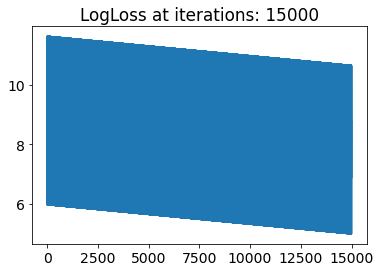

LogLoss  when eta = 0.0003125, iterations = 15000 w = [ 20.71846316 -45.92667975   1.51486477 -45.26816197], LogLoss = 7.793758097492481
Time 0.870061 s


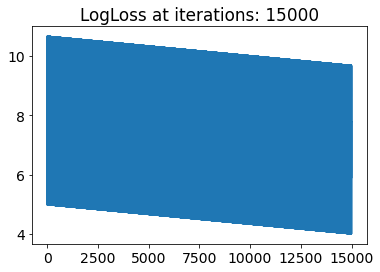

LogLoss  when eta = 0.0002380952380952381, iterations = 20000 w = [ 21.67058384 -46.40339076   1.25460097 -40.51406512], LogLoss = 6.935598149391287
Time 1.1646 s


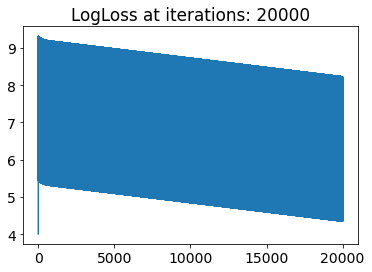

LogLoss  when eta = 0.0002380952380952381, iterations = 20000 w = [ 22.62282206 -46.87986669   1.11187246 -35.75644224], LogLoss = 5.936433172642448
Time 1.83263 s


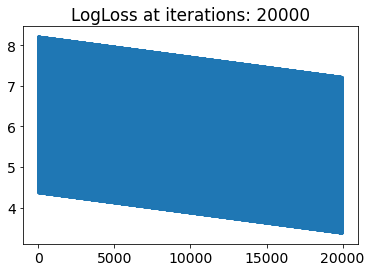

LogLoss  when eta = 0.0002380952380952381, iterations = 20000 w = [ 23.57502617 -47.35633566   0.96510286 -30.99909097], LogLoss = 4.775313471967307
Time 1.47379 s


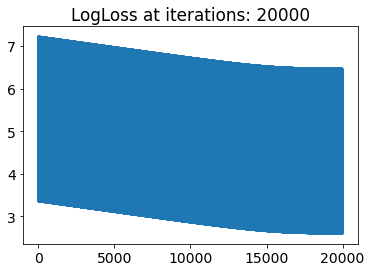

LogLoss  when eta = 0.0002380952380952381, iterations = 20000 w = [ 24.48602291 -47.81204096   0.88233247 -26.44617653], LogLoss = 6.575506534941366
Time 1.15561 s


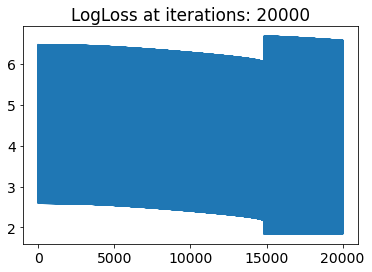

LogLoss  when eta = 0.0002380952380952381, iterations = 20000 w = [ 25.27958543 -48.20908548   0.77703087 -22.48099643], LogLoss = 4.923590453142557
Time 1.1328 s


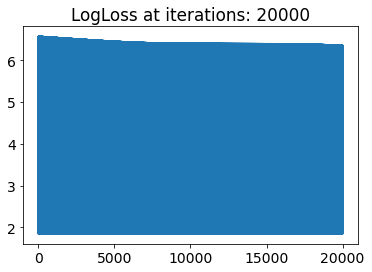

LogLoss  when eta = 0.0002380952380952381, iterations = 20000 w = [ 25.98244842 -48.72841049   0.6971761  -21.45544169], LogLoss = 3.498425247749816
Time 1.39968 s


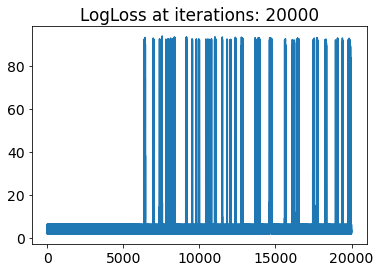

LogLoss  when eta = 0.0002380952380952381, iterations = 20000 w = [ 26.64515234 -49.28089665   0.72702378 -21.62661369], LogLoss = 6.217179424464495
Time 1.35761 s


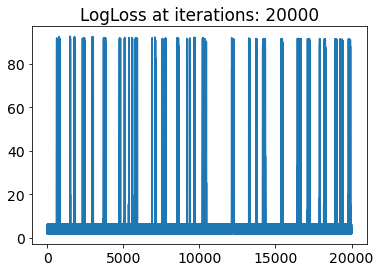

LogLoss  when eta = 0.00016129032258064516, iterations = 30000 w = [ 27.39330035 -49.56971858   0.65429236 -18.30951252], LogLoss = 2.485591834703622
Time 2.17106 s


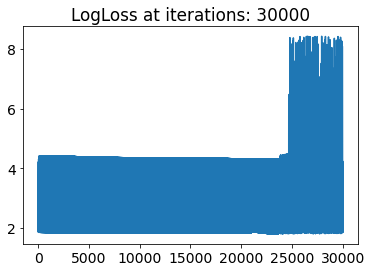

LogLoss  when eta = 0.00016129032258064516, iterations = 30000 w = [ 27.87884953 -49.33581185   0.62904251 -18.25498757], LogLoss = 3.819602395352169
Time 2.47286 s


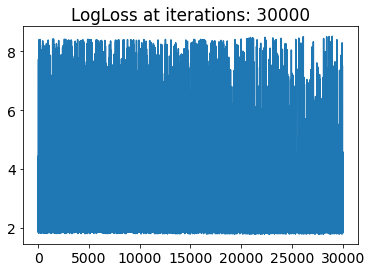

LogLoss  when eta = 0.00016129032258064516, iterations = 30000 w = [ 28.36369341 -49.09440718   0.63853709 -18.25333423], LogLoss = 3.1739819189030465
Time 1.88424 s


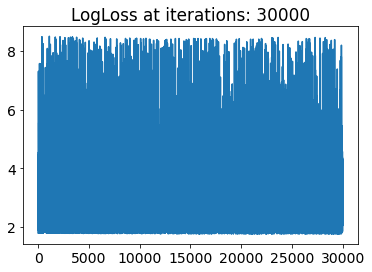

LogLoss  when eta = 0.00016129032258064516, iterations = 30000 w = [ 28.84544483 -48.84507557   0.65200148 -18.30323995], LogLoss = 2.392819052239009
Time 2.22565 s


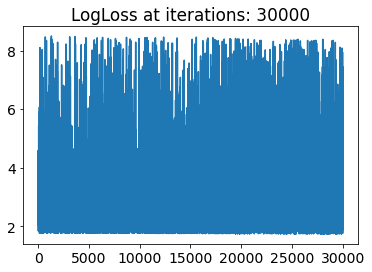

LogLoss  when eta = 0.00016129032258064516, iterations = 30000 w = [ 29.32621673 -48.60220761   0.680958   -18.3015479 ], LogLoss = 4.440046950817136
Time 1.96632 s


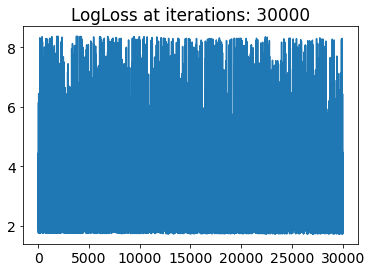

LogLoss  when eta = 0.00016129032258064516, iterations = 30000 w = [ 29.80452842 -48.35274442   0.63042588 -18.34721195], LogLoss = 4.303612487818831
Time 2.02462 s


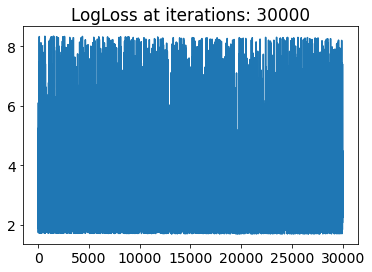

LogLoss  when eta = 0.00016129032258064516, iterations = 30000 w = [ 30.28410047 -48.10840392   0.6641027  -18.35341588], LogLoss = 4.416627043355981
Time 2.15134 s


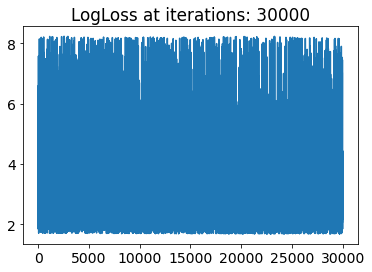

LogLoss  when eta = 0.00012195121951219512, iterations = 40000 w = [ 30.91782437 -48.160503     0.61727323 -16.50619884], LogLoss = 3.3464634570980025
Time 2.814 s


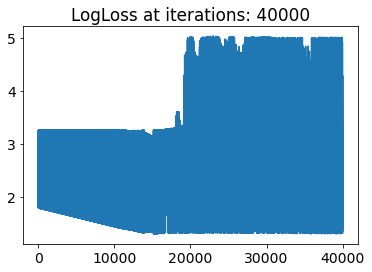

LogLoss  when eta = 0.00012195121951219512, iterations = 40000 w = [ 31.41021322 -47.91703561   0.60712059 -16.51562281], LogLoss = 3.306183346303096
Time 3.09775 s


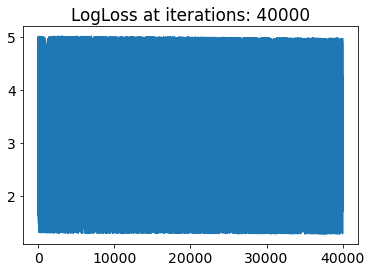

LogLoss  when eta = 0.00012195121951219512, iterations = 40000 w = [ 31.89916623 -47.67242688   0.57962753 -16.52640524], LogLoss = 2.0500573897978933
Time 2.8611 s


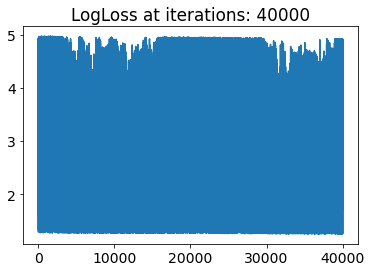

LogLoss  when eta = 0.00012195121951219512, iterations = 40000 w = [ 32.38564509 -47.42656256   0.57774964 -16.53969748], LogLoss = 2.1160813990716023
Time 2.60221 s


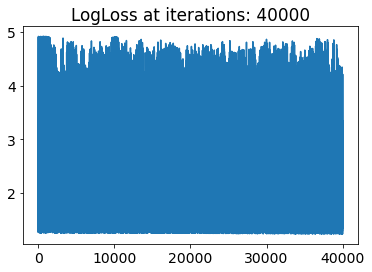

LogLoss  when eta = 0.00012195121951219512, iterations = 40000 w = [ 32.87235726 -47.18155098   0.61414873 -16.54569475], LogLoss = 3.3532987648285344
Time 2.72889 s


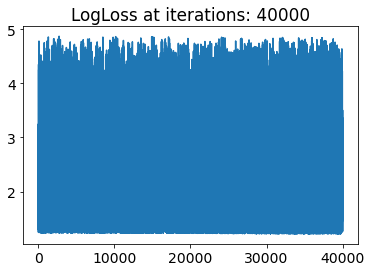

LogLoss  when eta = 0.00012195121951219512, iterations = 40000 w = [ 33.35833593 -46.93653867   0.60960693 -16.55248254], LogLoss = 3.3360430800600427
Time 3.00318 s


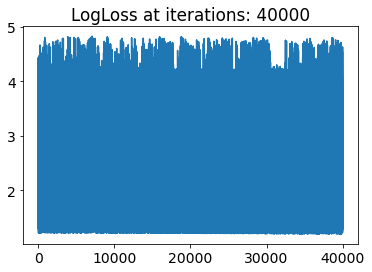

LogLoss  when eta = 0.00012195121951219512, iterations = 40000 w = [ 33.84488793 -46.69246976   0.60029149 -16.55434195], LogLoss = 3.2975871676857174
Time 2.32566 s


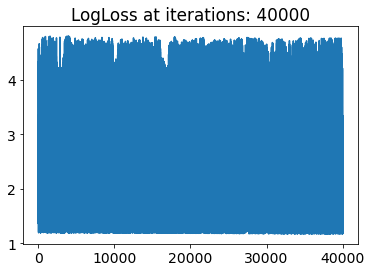

In [341]:
#lets change Theta and iterations
n = X.shape[0]
np.random.seed(42)
w = np.random.randn(X.shape[1])
theta = 1e-2
iterations = 1e4

t0, t1 = 5, 1000

for iterations in [5000, 10000, 15000, 20000, 30000, 40000]:
    for eta in [0.0001, 0.00025, 0.0005, 0.00075, 0.0085, 0.001, 0.01]:
        start =time.time()
        iterat, errs = params(t0 / (iterations + t1), iterations, w, n, X) 
        print ("Time {:g} s".format(time.time() - start))    
        plt.plot(iterat, errs)    
        plt.title(f"LogLoss at iterations: {iterations}")

        plt.show()

In [342]:
err = eval_LR_model(X_st, y, iterations=200, eta=0.1)

20 [-0.34558525  1.12283454  7.03958419 -9.67878243] 0.12124460937474132
20 [-0.34554789  1.12456429  7.0426161  -9.68475843] 0.12115978415693471
20 [-0.34547394  1.12798857  7.04862267 -9.69659479] 0.12099197609306352
20 [-0.3453637   1.1330961   7.05759527 -9.71426753] 0.12074191845336493
20 [-0.34521767  1.13986905  7.06952024 -9.73773859] 0.12041073012211609
20 [-0.3450366   1.14828317  7.08437909 -9.76695614] 0.11999990205058755
20 [-0.34482148  1.15830799  7.10214865 -9.80185498] 0.11951127921169953
20 [-0.34457352  1.169907    7.12280123 -9.84235707] 0.11894703847076211
20 [-0.34429407  1.18303799  7.14630488 -9.88837218] 0.11830966287302654
20 [-0.34398463  1.19765326  7.17262358 -9.93979859] 0.11760191291692841
40 [ -0.3286633    2.05686422   9.25754179 -13.68732048] 0.07665715044335554
40 [ -0.3286554    2.05746745   9.25965006 -13.6908271 ] 0.07662685250083777
40 [ -0.32863977   2.05866194   9.26382793 -13.69777511] 0.07656685709879182
40 [ -0.32861646   2.06044455   9.27007

In [343]:
err = eval_LR_model(X_st, y, iterations=550, eta=0.0001)

55 [ -0.32619921   2.34755798  10.53486233 -15.73535494] 0.06086237399466112
55 [ -0.32619902   2.34786252  10.53661231 -15.73806622] 0.06084376350922457
55 [ -0.32619866   2.3484656   10.54008041 -15.74343895] 0.06080690136325626
55 [ -0.32619816   2.34936573  10.54526445 -15.7514687 ] 0.06075185061907033
55 [ -0.3261976    2.35056057  10.55216103 -15.76214843] 0.06067870805438549
55 [ -0.32619704   2.35204691  10.56076545 -15.77546852] 0.06058760370717129
55 [ -0.32619662   2.35382068  10.57107178 -15.79141676] 0.06047870025993406
55 [ -0.32619648   2.35587702  10.58307287 -15.80997843] 0.0603521922691899
55 [ -0.32619679   2.35821026  10.59676034 -15.83113635] 0.06020830524729477
55 [ -0.32619775   2.36081394  10.61212461 -15.8548709 ] 0.06004729460511662
110 [ -0.34124789   2.61051561  13.86672373 -20.59192565] 0.03496946775675301
110 [ -0.34125782   2.610522    13.86780666 -20.59343066] 0.034963377430926
110 [ -0.34127751   2.6105346   13.869953   -20.59641349] 0.03495130986780288

In [344]:
w, err = eval_LR_model(X_st, y, iterations=100, eta=0.000001)

10 [-0.37500575  0.05834413  5.428511   -6.34158378] 0.18152676553319083
10 [-0.37488785  0.0615428   5.43308311 -6.35121303] 0.1813074663595497
10 [-0.37465501  0.06787524  5.44213176 -6.37027359] 0.18087432174046442
10 [-0.37430936  0.07732111  5.45562135 -6.39869859] 0.1802307038981653
10 [-0.37385419  0.0898479   5.47349599 -6.4363826 ] 0.17938171757484594
10 [-0.37329389  0.10541087  5.49568088 -6.48318317] 0.17833408725608674
10 [-0.37263383  0.12395313  5.52208404 -6.53892294] 0.17709601098695402
10 [-0.37188029  0.14540575  5.55259857 -6.60339199] 0.1756769872953054
10 [-0.37104038  0.16968802  5.58710512 -6.67635076] 0.17408762253737803
10 [-0.37012183  0.19670781  5.62547446 -6.75753306] 0.17233942624908336
20 [-0.34558525  1.12283454  7.03958419 -9.67878243] 0.12124460937474132
20 [-0.34554789  1.12456429  7.0426161  -9.68475843] 0.12115978415693471
20 [-0.34547394  1.12798857  7.04862267 -9.69659479] 0.12099197609306352
20 [-0.3453637   1.1330961   7.05759527 -9.71426753] 0

In [345]:
w, err = eval_LR_model(X_st, y, iterations=5730, eta=5)

573 [ -0.54435989   1.75928715  23.68153478 -33.49272034] 0.007495549599485123
573 [ -0.54436726   1.75925261  23.68178333 -33.49303759] 0.0074952596287422915
573 [ -0.54438187   1.75918413  23.68227602 -33.49366645] 0.007494684879514589
573 [ -0.54440372   1.75908174  23.68301279 -33.49460686] 0.0074938254711105655
573 [ -0.5444328    1.75894542  23.68399358 -33.49585871] 0.007492681587207002
573 [ -0.54446912   1.7587752   23.68521827 -33.49742189] 0.007491253475750051
573 [ -0.54451267   1.75857108  23.68668675 -33.49929622] 0.007489541448820447
573 [ -0.54456344   1.75833309  23.68839886 -33.5014815 ] 0.007487545882462173
573 [ -0.54462144   1.75806123  23.69035442 -33.5039775 ] 0.0074852672164759295
573 [ -0.54468667   1.75775554  23.69255321 -33.50678394] 0.007482705954176478
1146 [ -0.68606985   1.09795542  28.09983024 -39.1027118 ] 0.003769528851000156
1146 [ -0.68607415   1.09793545  28.0999563  -39.10287119] 0.003769454948681893
1146 [ -0.68608268   1.09789585  28.10020619 -3